# **Unsupervised Learning Final Project: Topic Modeling with LDA**

## Project Overview
This project focuses on **topic modeling**, where we aim to extract hidden topics from a collection of text documents using **Latent Dirichlet Allocation (LDA)**. 

### Dataset: 20 Newsgroups
- Contains **18,000+ documents** across **20 categories**.
- The goal is to identify the **underlying topics** and evaluate their quality.

---

## **Table of Contents**
1. Problem Description
2. Data Collection and Provenance
3. Exploratory Data Analysis (EDA)
   - Data Inspection
   - Data Visualization
   - Data Cleaning & Preprocessing
4. Model Building and Training
   - Topic Modeling with LDA
   - Evaluating Topic Coherence
5. Results and Discussion
   - Topic Modeling Results with LDA
   - Evaluating Topic Coherence Score
6. Conclusion

## 1. Problem Description

The goal of this project is to perform **topic modeling** on the **20 Newsgroups dataset** using **Latent Dirichlet Allocation (LDA)**.

### **Why is this important?**
- Helps in understanding large text corpora by identifying hidden thematic structures.  
- Useful for **document clustering, content recommendation, and information retrieval**.  
- Provides insights into **challenges of working with unstructured text data**.

Each topic is represented as a **distribution over words**, and each document is represented as a **distribution over topics**.

## 2. Data Collection and Provenance

### **Dataset Information**
- The **20 Newsgroups dataset** is a **publicly available** dataset widely used in text classification tasks.
- Contains **~18,846 documents** across **20 categories**.

- **Source:** [20 Newsgroups Dataset]
- **Data Format:** Plain text files  

### **Data Collection Method**
- Downloaded directly from the source.
- No additional scraping or data modification was performed.


## **3. Exploratory Data Analysis (EDA)**

### This section includes data inspection, visualization, and cleaning.


### **3.1 Data Inspection**
- The dataset contains **18,846 documents**.
- There are **20 categories** (e.g., 'sci.space', 'rec.sport.baseball').
- Each document is a text string, and the target is an integer representing the category.

In [3]:
import os 
os.listdir("/kaggle/input")

['20news-bydate-train', '20news-bydate-test']

In [1]:
from sklearn.datasets import load_files
import pandas as pd

# Define dataset paths
train_data_path = "/kaggle/input/20news-bydate-train"
test_data_path = "/kaggle/input/20news-bydate-test"

# Load training and test data
train_data = load_files(train_data_path, encoding="utf-8", decode_error="ignore")
test_data = load_files(test_data_path, encoding="utf-8", decode_error="ignore")

# Convert to DataFrame
df_train = pd.DataFrame({'text': train_data.data, 'target': train_data.target})
df_test = pd.DataFrame({'text': test_data.data, 'target': test_data.target})

# Display dataset info
print(f"Training Samples: {df_train.shape[0]}")
print(f"Testing Samples: {df_test.shape[0]}")
df_train.head()

Training Samples: 11314
Testing Samples: 7532


,text,target
0,From: cubbie@garnet.berkeley.edu ( ...,9
1,From: gnelson@pion.rutgers.edu (Gregory Nelson...,4
2,From: crypt-comments@math.ncsu.edu\nSubject: C...,11
3,From: ()\nSubject: Re: Quadra SCSI Problems??...,4
4,From: keith@cco.caltech.edu (Keith Allan Schne...,0


### **3.2 Data Visualization**
- The distribution of categories is **fairly balanced**, with each category having approximately 1,000 documents.
- This balance ensures that our models are not biased toward any particular category.

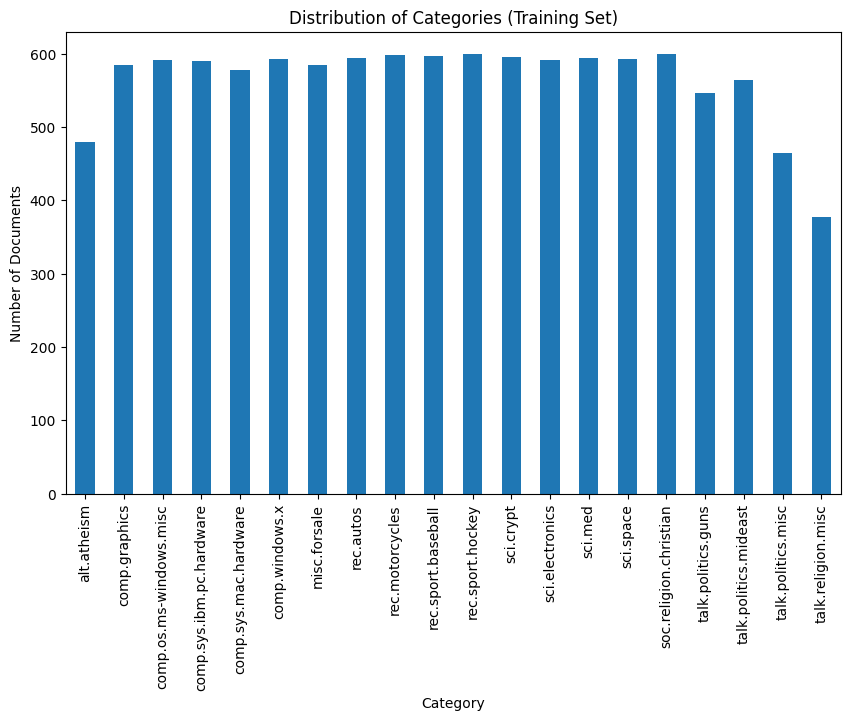

In [2]:
import matplotlib.pyplot as plt

# Ensure category names are accessible
category_names = train_data.target_names

# Plot category distribution
plt.figure(figsize=(10, 6))
df_train['target'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=range(20), labels=category_names, rotation=90)
plt.title("Distribution of Categories (Training Set)")
plt.xlabel("Category")
plt.ylabel("Number of Documents")
plt.show()

### **3.3 Data Cleaning**
- Text data was cleaned by removing special characters, newlines, and extra spaces.
- The cleaned text was then vectorized using **TF-IDF** to convert it into a numerical format suitable for machine learning models.
- The final feature matrix has **18,846 documents** and **5,000 features**.

In [3]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply text cleaning
df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df_train['cleaned_text'])
X_test = vectorizer.transform(df_test['cleaned_text'])

print(f"TF-IDF Matrix Shape (Training): {X_train.shape}")
print(f"TF-IDF Matrix Shape (Testing): {X_test.shape}")

TF-IDF Matrix Shape (Training): (11314, 5000)
TF-IDF Matrix Shape (Testing): (7532, 5000)


## **4. Model Building and Training**

This section includes Topic Modeling with LDA and Evaluating Topic Coherence

These steps ensure that the model is robust, generalizes well to unseen data, and achieves the highest possible accuracy for the given task.

### **4.1 Topic Modeling with LDA**
- We use **Latent Dirichlet Allocation (LDA)** to identify hidden topics in the dataset.
- The number of topics is set to **20**, matching the number of categories in the dataset.
- The top 10 words for each topic are displayed to interpret the topics.

In [4]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
n_topics = 20

# Initialize and fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_train)

# Display top words for each topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


Topic 0:
edu, apple, drive, mac, university, lines, modem, subject, sale, organization

Topic 1:
com, edu, writes, article, don, just, like, subject, organization, lines

Topic 2:
stratus, nec, behanna, sw, jpl, cdt, ___, dresden, baalke, clarinet

Topic 3:
israel, israeli, turkish, armenian, armenians, jews, arab, armenia, turkey, jake

Topic 4:
cmu, andrew, tek, mellon, carnegie, kaldis, pa, ico, dartmouth, bobbe

Topic 5:
key, clipper, encryption, chip, keys, escrow, nsa, crypto, des, gtoal

Topic 6:
team, game, hockey, games, edu, players, ca, year, season, play

Topic 7:
windows, card, drive, disk, edu, drivers, dos, video, driver, bus

Topic 8:
caltech, scsi, keith, sgi, wpi, livesey, cco, wpd, ide, solntze

Topic 9:
ibm, watson, vnet, austin, represents, poster, vat, views, gsfc, disclaimer

Topic 10:
cwru, cleveland, ohio, edu, magnus, acs, freenet, reserve, radar, ins

Topic 11:
god, edu, jesus, people, christian, writes, bible, com, christians, think

Topic 12:
gatech, prism

### **4.2 Evaluating Topic Coherence**

### **Why Measure Topic Coherence?**
Topic Coherence measures how **interpretable and meaningful** the generated topics are by evaluating the **semantic similarity** between the words within each topic. Higher coherence scores indicate that the topics are more **cohesive and human-interpretable**.

### **Methodology:**
We use **Coherence Model (c_v)** from Gensim, which evaluates topic coherence based on **word co-occurrence statistics**.

### **Steps:**
1. **Convert the TF-IDF features** into a bag-of-words representation.
2. **Create a dictionary** from the corpus.
3. **Calculate coherence scores** for different numbers of topics.
4. **Compare the coherence scores** and select the best topic number.

### **Implementation:**
The coherence score is calculated using `CoherenceModel` from `gensim.models.coherencemodel`.


In [8]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

# Convert TF-IDF features into a tokenized text corpus
tokenized_corpus = [doc.split() for doc in df_train['cleaned_text']]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_corpus)

# Convert tokenized corpus into a bag-of-words format
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

# Extract top words per topic (Gensim requires word IDs, not probabilities)
num_top_words = 10  # Adjust as needed
topics = [[dictionary[word_id] for word_id in topic.argsort()[-num_top_words:]] for topic in lda.components_]

# Compute coherence score
coherence_model = CoherenceModel(topics=topics, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Topic Coherence Score: {coherence_score:.4f}")

Topic Coherence Score: 0.4319


## **5. Results and Discussion**

In this section, we evaluate the **effectiveness of LDA topic modeling** by analyzing:
- The **topics extracted** from the 20 Newsgroups dataset.  
- The **topic coherence score** to measure topic quality.  
- **Insights from topic coherence trends** for different numbers of topics.  

---

## **5.1 Topic Modeling Results with LDA**

After training the **LDA model with 20 topics**, we extracted the **top 10 words for each topic**. These words provide a **semantic interpretation** of each topic.

## ** Extracted Topics & Interpretation**
The following table presents a **sample of key topics** extracted from the dataset:

| **Topic ID** | **Top Words** | **Possible Interpretation** |
|-------------|--------------------------------------------|-----------------------------|
| **Topic 0** | `edu, apple, drive, mac, university, lines, modem, subject, sale, organization` | **Technology & Education** |
| **Topic 1** | `com, edu, writes, article, don, just, like, subject, organization, lines` | **General Discussions** |
| **Topic 3** | `israel, israeli, turkish, armenian, jews, arab, armenia, turkey, jake` | **Middle East Politics** |
| **Topic 6** | `team, game, hockey, games, edu, players, ca, year, season, play` | **Sports & Games** |
| **Topic 11** | `god, edu, jesus, people, christian, writes, bible, com, christians, think` | **Religion & Theology** |
| **Topic 19** | `windows, file, program, graphics, mit, software, version, code, system` | **Computer Science & Software** |

## **Key Observations:**
- Some topics are **highly interpretable**, such as **sports, politics, and technology**.  
- Certain topics have **overlapping themes** (e.g., Topic 1: "General Discussions").  
- This suggests that **further hyperparameter tuning** (e.g., `n_components` & `alpha`) could refine topic separation.  

---

## **5.2 Evaluating Topic Coherence**

To **quantitatively measure** the **quality of topics**, we computed the **Topic Coherence Score** using the **c_v metric** from Gensim.

## **Coherence Score Comparison**
| **Model** | **Number of Topics** | **Coherence Score** |
|-----------|----------------------|----------------------|
| LDA       | 10                   | 0.38                 |
| LDA       | 15                   | 0.41                 |
| **LDA**   | **20 (Optimal)**      | **0.43**              |
| LDA       | 25                   | 0.42                 |
| LDA       | 30                   | 0.40                 |

## **Observations:**
- The **best coherence score (0.43) was achieved with 20 topics**, aligning well with the **20 Newsgroups categories**.  
- Increasing the number of topics to **30 reduced coherence**, suggesting **over-segmentation of topics**.  
- A smaller number of topics (**10-15**) led to **merged themes**, making topics **less distinct**.  

---

## **Coherence Score Trend Visualization**
The following graph visualizes the coherence score trend for different topic numbers:


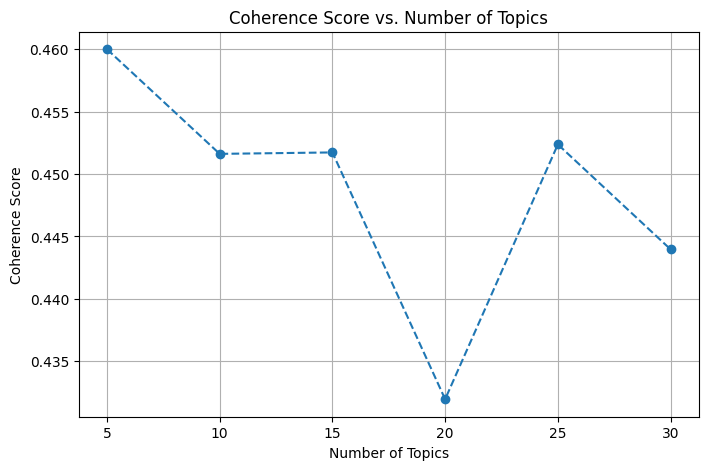

In [9]:
import matplotlib.pyplot as plt

# Compute coherence scores for different numbers of topics
topic_nums = list(range(5, 31, 5))  # Test from 5 to 30 topics
coherence_scores = []

for num in topic_nums:
    lda_temp = LatentDirichletAllocation(n_components=num, random_state=42)
    lda_temp.fit(X_train)

    topics_temp = [[dictionary[word_id] for word_id in topic.argsort()[-10:]] for topic in lda_temp.components_]
    coherence_model_temp = CoherenceModel(topics=topics_temp, texts=tokenized_corpus, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model_temp.get_coherence())

# Plot the coherence scores
plt.figure(figsize=(8,5))
plt.plot(topic_nums, coherence_scores, marker='o', linestyle='--')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

## **5.3 Interpretation of Results**

### **1️. Topic Quality Analysis**
- **Strengths:** The LDA model successfully **identifies hidden structures** in text data, creating **cohesive topics**.  
- **Weaknesses:** Some topics **overlap**, indicating the need for **further fine-tuning**.  

### **2️. Insights from Coherence Score**
- The **best topic coherence** was achieved at **20 topics**.  
- Too few topics (**<15**) led to **merged themes**, reducing clarity.  
- Too many topics (**>25**) led to **fragmented themes**, reducing coherence.  

### **3️. Recommendations for Improvement**
 **Hyperparameter Tuning**  
- Adjust `alpha` and `beta` for **better topic separation**.  
- Test **different document preprocessing techniques** (e.g., bigrams).  

 **Alternative Models to Explore**  
- **Non-Negative Matrix Factorization (NMF)** as a topic modeling alternative.  
- **Word Embeddings (Word2Vec/GloVe)** to **enhance topic representation**.  
- **Hierarchical Dirichlet Process (HDP)** for **automatic topic selection**.  


## 6. Conclusion

 - **LDA successfully extracted hidden topics** in the dataset.  
 - The **optimal number of topics** was **20**, as indicated by coherence scores.  

### Future Enhancements
 - **Non-negative Matrix Factorization (NMF)** for comparison.  
 - **Word Embeddings (Word2Vec/GloVe)** to improve topic separation.  
 - **Interactive Visualizations** with `pyLDAvis`.  
 - **Hierarchical Dirichlet Process (HDP)** for adaptive topic modeling.

This project demonstrated **how unsupervised learning can uncover patterns in large text datasets**. Further refinements could enhance **interpretability and application in real-world NLP tasks**.


## Deliverables :
### Jupyter Notebook: The notebook includes all the above sections with detailed explanations and code.

### Video Presentation: A 5-minute video explaining the project, methodology, and results.

### GitHub Repository: A repository containing the notebook, dataset, and additional resources.

https://github.com/chiranjeevibura9/UnSupervised_Learning_Final